In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. EDA

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/TNT/산업인공지능/실습/Task4/hourly_electricity.csv")
df.head()

,Unnamed: 0,power_usage,t,days_from_start,categorical_id,date,id,hour,day,day_of_week,month,hours_from_start,categorical_day_of_week,categorical_hour
0,17544,2.538071,26304.0,1096,MT_001,2014-01-01 00:00:00,MT_001,0,1,2,1,26304.0,2,0
1,17545,2.855330,26305.0,1096,MT_001,2014-01-01 01:00:00,MT_001,1,1,2,1,26305.0,2,1
2,17546,2.855330,26306.0,1096,MT_001,2014-01-01 02:00:00,MT_001,2,1,2,1,26306.0,2,2
3,17547,2.855330,26307.0,1096,MT_001,2014-01-01 03:00:00,MT_001,3,1,2,1,26307.0,2,3
4,17548,2.538071,26308.0,1096,MT_001,2014-01-01 04:00:00,MT_001,4,1,2,1,26308.0,2,4


In [ ]:
df.tail()

,Unnamed: 0,power_usage,t,days_from_start,categorical_id,date,id,hour,day,day_of_week,month,hours_from_start,categorical_day_of_week,categorical_hour
2198067,10461482,20824.324324,32299.0,1345,MT_370,2014-09-07 19:00:00,MT_370,19,7,6,9,32299.0,6,19
2198068,10461483,19527.027027,32300.0,1345,MT_370,2014-09-07 20:00:00,MT_370,20,7,6,9,32300.0,6,20
2198069,10461484,20202.702703,32301.0,1345,MT_370,2014-09-07 21:00:00,MT_370,21,7,6,9,32301.0,6,21
2198070,10461485,19851.351351,32302.0,1345,MT_370,2014-09-07 22:00:00,MT_370,22,7,6,9,32302.0,6,22
2198071,10461486,20135.135135,32303.0,1345,MT_370,2014-09-07 23:00:00,MT_370,23,7,6,9,32303.0,6,23


In [ ]:
print(df['Unnamed: 0'].value_counts().sort_index())
print(df['t'].value_counts().sort_index())
print(df['days_from_start'].value_counts().sort_index())
print(df['categorical_id'].value_counts().sort_index())

17544       1
17545       1
17546       1
17547       1
17548       1
           ..
10461482    1
10461483    1
10461484    1
10461485    1
10461486    1
Name: Unnamed: 0, Length: 2198072, dtype: int64
26304.0    350
26305.0    350
26306.0    350
26307.0    350
26308.0    350
          ... 
32299.0    369
32300.0    369
32301.0    369
32302.0    369
32303.0    369
Name: t, Length: 6000, dtype: int64
1096    8400
1097    8400
1098    8400
1099    8400
1100    8400
        ... 
1341    8856
1342    8856
1343    8856
1344    8856
1345    8856
Name: days_from_start, Length: 250, dtype: int64
MT_001    6000
MT_002    6000
MT_003    6000
MT_004    6000
MT_005    6000
          ... 
MT_366    6000
MT_367    6000
MT_368    6000
MT_369    6000
MT_370    6000
Name: categorical_id, Length: 369, dtype: int64


In [ ]:
print(sum(df['categorical_id'] != df['id']))
print(sum(df['t'] != df['hours_from_start']))

0
0


In [ ]:
df.drop(['Unnamed: 0', 't', 'days_from_start', 'categorical_id', 'id', 'hours_from_start'], axis = 1, inplace = True)

In [ ]:
df.head()

,power_usage,date,hour,day,day_of_week,month,categorical_day_of_week,categorical_hour
0,2.538071,2014-01-01 00:00:00,0,1,2,1,2,0
1,2.855330,2014-01-01 01:00:00,1,1,2,1,2,1
2,2.855330,2014-01-01 02:00:00,2,1,2,1,2,2
3,2.855330,2014-01-01 03:00:00,3,1,2,1,2,3
4,2.538071,2014-01-01 04:00:00,4,1,2,1,2,4


In [ ]:
# 시간
print(df['hour'].unique())
print(df['day'].unique())
print(df['day_of_week'].unique())
print(df['month'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
[2 3 4 5 6 0 1]
[1 2 3 4 5 6 7 8 9]


In [ ]:
print(df['hour'].value_counts().sort_index())
print(df['day'].value_counts().sort_index())
print(df['day_of_week'].value_counts().sort_index())
print(df['month'].value_counts().sort_index())

# 기록에 빠진 날짜가 있다

0     91586
1     91586
2     91586
3     91586
4     91586
5     91586
6     91586
7     91586
8     91586
9     91586
10    91586
11    91586
12    91586
13    91586
14    91586
15    91586
16    91587
17    91587
18    91587
19    91587
20    91587
21    91587
22    91587
23    91587
Name: hour, dtype: int64
1     78912
2     78912
3     78912
4     78936
5     78960
6     78960
7     78960
8     70104
9     70104
10    70104
11    70104
12    70128
13    70136
14    70416
15    70416
16    70416
17    70440
18    70512
19    70512
20    70512
21    70512
22    70512
23    70512
24    70512
25    70512
26    70512
27    70512
28    70512
29    61728
30    61728
31    44064
Name: day, dtype: int64
0    307656
1    307992
2    316440
3    316448
4    316512
5    316512
6    316512
Name: day_of_week, dtype: int64
1    265512
2    244800
3    273392
4    264960
5    273792
6    264960
7    274128
8    274536
9     61992
Name: month, dtype: int64


In [ ]:
print(sum(df['hour'] != df['categorical_hour']))
print(sum(df['day_of_week'] != df['categorical_day_of_week']))

0
0


In [ ]:
df.drop(['categorical_hour', 'categorical_day_of_week'], axis = 1, inplace = True)

In [ ]:
df.head()

,power_usage,date,hour,day,day_of_week,month
0,2.538071,2014-01-01 00:00:00,0,1,2,1
1,2.855330,2014-01-01 01:00:00,1,1,2,1
2,2.855330,2014-01-01 02:00:00,2,1,2,1
3,2.855330,2014-01-01 03:00:00,3,1,2,1
4,2.538071,2014-01-01 04:00:00,4,1,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198072 entries, 0 to 2198071
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   power_usage  float64
 1   date         object 
 2   hour         int64  
 3   day          int64  
 4   day_of_week  int64  
 5   month        int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 100.6+ MB


In [ ]:
df.isnull().sum()

power_usage    0
date           0
hour           0
day            0
day_of_week    0
month          0
dtype: int64

Plot power_usage

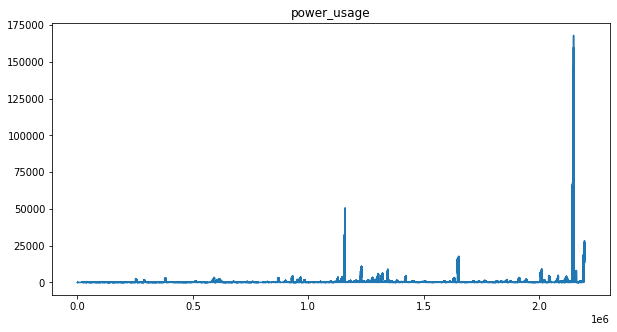

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(df['power_usage'])
plt.title('power_usage')
plt.show()

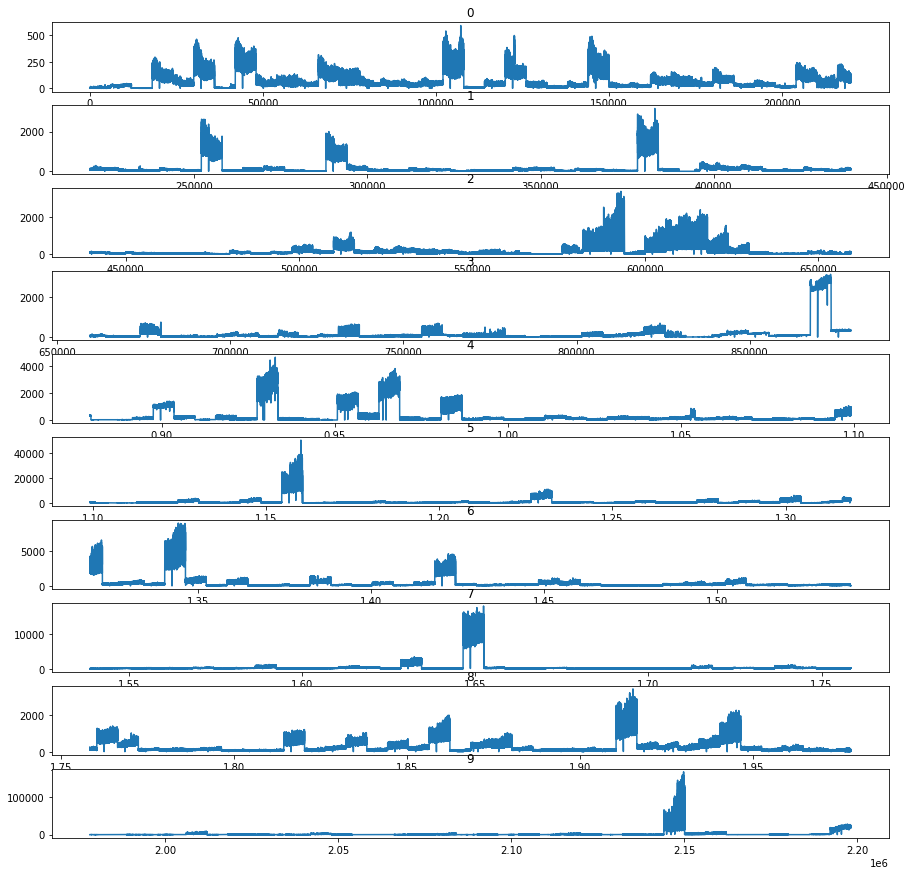

In [ ]:
split = int(len(df) / 10)

fig, axes = plt.subplots(10, 1, figsize = (15, 15))

for i in range(10):
  if i == 9:
    axes[i].plot(df['power_usage'][i*split:])
  else:
    axes[i].plot(df['power_usage'][i*split:(i+1)*split])
  axes[i].set_title(i)

plt.show()

In [ ]:
def make_stat_df(df, col, start, end):
  data_df = pd.DataFrame(columns = ['max', 'min', 'avg', 'std'])
  for i in range(start, end + 1):
    data = df[df[col] == i].power_usage
    data_df.loc[i] = [max(data), min(data), np.average(data),  np.std(data)]

  return data_df

In [ ]:
# 월별

months = make_stat_df(df, 'month', 1, 9)
months

,max,min,avg,std
1,66500.0,0.0,545.368115,2446.517876
2,58650.0,0.0,529.028144,2308.176575
3,68200.0,0.0,519.714829,2348.555329
4,88175.0,0.0,558.218122,2778.173851
5,102950.0,0.0,598.131619,3291.649232
6,145700.0,0.0,656.340868,3933.715042
7,146825.0,0.0,730.456935,4792.475599
8,168100.0,0.0,753.554485,5239.718821
9,133800.0,0.0,759.119582,5154.300520


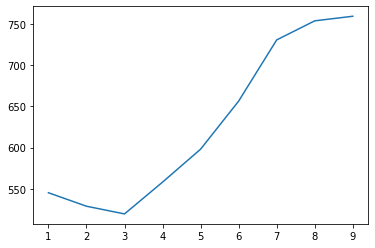

In [ ]:
plt.plot(months.avg)

In [ ]:
# 요일별
days_week = make_stat_df(df, 'day_of_week', 0, 6)
days_week

,max,min,avg,std
0,143175.0,0.0,608.821719,3560.010566
1,168100.0,0.0,620.195313,3667.768590
2,162600.0,0.0,611.029299,3583.465782
3,157650.0,0.0,617.962634,3599.066280
4,155925.0,0.0,626.531884,3649.635830
5,147075.0,0.0,625.846165,3696.913438
6,145700.0,0.0,608.255420,3670.278247


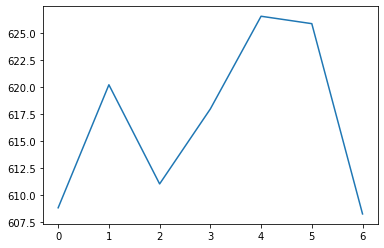

In [ ]:
plt.plot(days_week.avg)

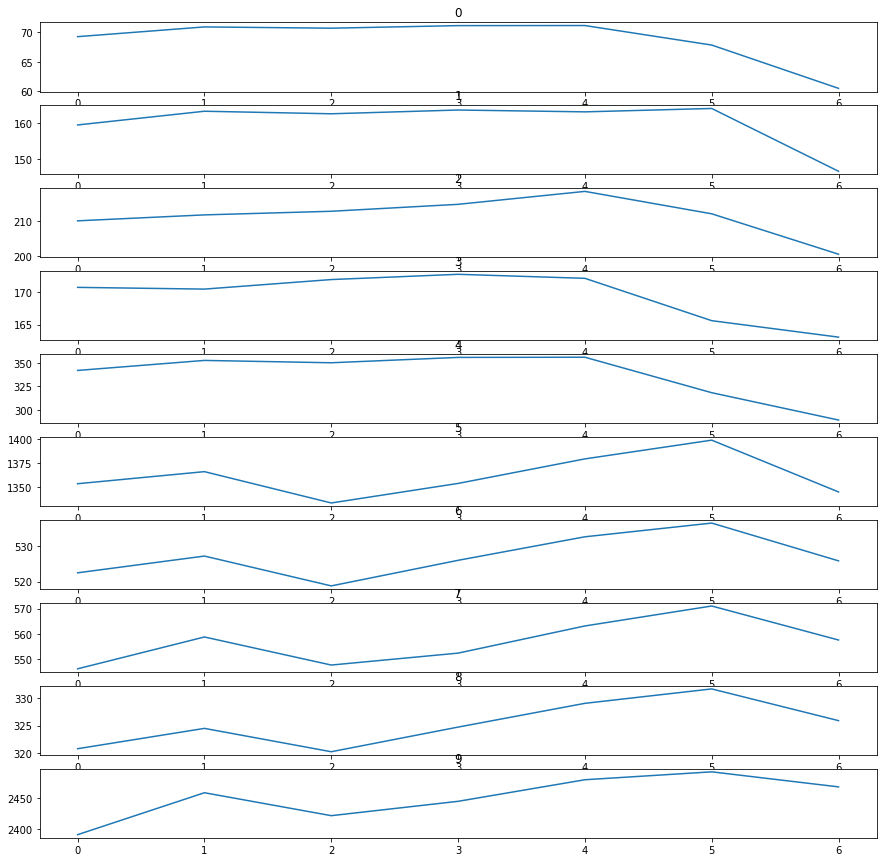

In [ ]:
split = int(len(df) / 10)

fig, axes = plt.subplots(10, 1, figsize = (15, 15))
for i in range(10):
  if i == 9:
    days_week = make_stat_df(df[i*split:], 'day_of_week', 0, 6)
  else:
    days_week = make_stat_df(df[i*split:(i+1)*split], 'day_of_week', 0, 6)
  
  axes[i].plot(days_week.avg)
  axes[i].set_title(i)

plt.show()

In [ ]:
# 일별
days = make_stat_df(df, 'day', 1, 31)
days

,max,min,avg,std
1,132925.0,0.0,593.443052,3473.750750
2,133800.0,0.0,614.812315,3540.404035
3,132600.0,0.0,616.005767,3564.487217
4,135400.0,0.0,618.752306,3586.769183
5,145650.0,0.0,624.150739,3679.925618
6,144100.0,0.0,624.871515,3659.823792
7,152575.0,0.0,621.226607,3665.376364
8,155925.0,0.0,616.387153,3644.918605
9,147075.0,0.0,610.863819,3530.113446
10,140850.0,0.0,615.799931,3588.146835


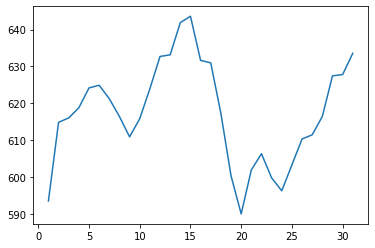

In [ ]:
plt.plot(days.avg)

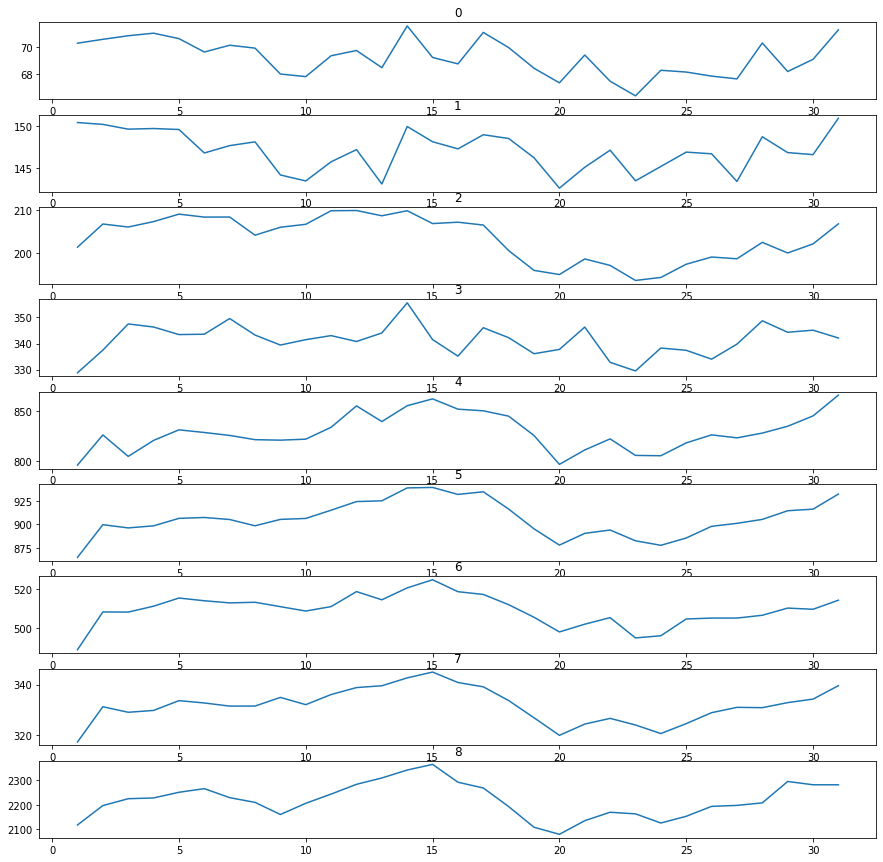

In [ ]:
split = int(len(df) / 9)

fig, axes = plt.subplots(9, 1, figsize = (15, 15))
for i in range(9):
  if i == 9:
    days = make_stat_df(df[i*split:], 'day', 1, 31)
  else:
    days = make_stat_df(df[i*split:(i+1)*split], 'day', 1, 31)
  
  axes[i].plot(days.avg)
  axes[i].set_title(i)

plt.show()

In [ ]:
# 시간별

hours = make_stat_df(df, 'hour', 0, 23)
hours

,max,min,avg,std
0,48700.000000,0.0,430.817012,1965.426991
1,35550.000000,0.0,361.685840,1548.584080
2,25775.000000,0.0,348.727940,1470.393301
3,25297.297297,0.0,338.513821,1406.936264
4,24459.459459,0.0,331.011721,1340.884904
5,25810.810811,0.0,349.010164,1429.351214
6,24270.270270,0.0,388.255831,1524.777400
7,25121.621622,0.0,428.476242,1615.551539
8,25027.027027,0.0,463.929164,1753.478892
9,80150.000000,0.0,608.027206,2840.115644


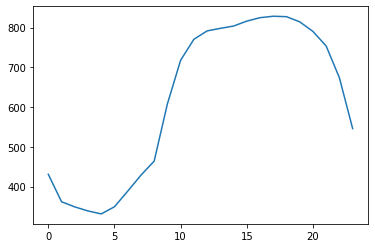

In [ ]:
plt.plot(hours.avg)

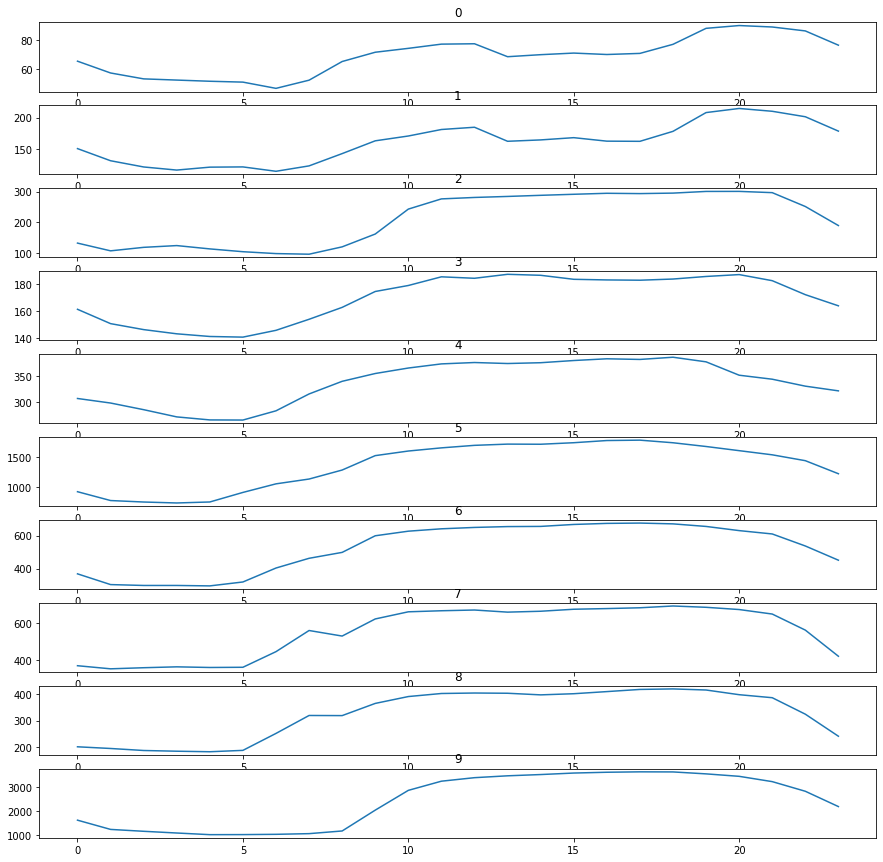

In [ ]:
split = int(len(df) / 10)

fig, axes = plt.subplots(10, 1, figsize = (15, 15))
for i in range(10):
  if i == 9:
    hours = make_stat_df(df[i*split:], 'hour', 0, 23)
  else:
    hours = make_stat_df(df[i*split:(i+1)*split], 'hour', 0, 23)
  
  axes[i].plot(hours.avg)
  axes[i].set_title(i)

plt.show()